In [108]:
import requests
import nltk 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity as distance

In [65]:
url='http://localhost:8080/users'
res=requests.get(url)
res

<Response [200]>

In [66]:
users=res.json()

In [67]:
lista_users=[]
for u in users:
    lista_users.append(u['userName'])

In [68]:
lista_users=list(set(lista_users))
lista_users

['Walter White',
 'Skyler White',
 'Danny Torrance',
 'Ellen Ripley',
 'Danny Torrances Finger',
 'Mike Wazowski',
 'Marty McFly',
 'Leia Organa',
 'John Snow',
 'J. Jonah Jameson',
 'John Wick',
 'Igritte',
 'Han Solo',
 'Tony Stark']

In [86]:
all_usermess=[]
for l in lista_users:
    url='http://localhost:8080/{}'.format(l)
    all_usermess.append(requests.get(url).json())
all_usermess

[[{'text': "Oh, no. I don't want to hear about the police.",
   'userName': 'Walter White'},
  {'text': "I don't want to hear about the police.",
   'userName': 'Walter White'},
  {'text': "That's not the truth.", 'userName': 'Walter White'},
  {'text': "OK, we're done here.", 'userName': 'Walter White'},
  {'text': "Who are you talking to right now? Who is it you think you see? Do you know how much I make a year? I mean, even if I told you, you wouldn't believe it. Do you know what would happen if I suddenly decided to stop going into work? A business big enough that it could be listed on the NASDAQ goes belly-up - disappears. It ceases to exist without me. No. You clearly don't know who you're talking to, so let me clue you in. I am not in danger, Skyler. I am the danger. A guy opens his door and gets shot, and you think that of me? No. I am the one who knocks.",
   'userName': 'Walter White'}],
 [{'text': "Walt, I've said it before. If you are in danger, we go to the police...",
   

In [90]:
for chat in all_usermess:
    print(chat)
    print('-----')
    print(chat['text'])

[{'text': "Oh, no. I don't want to hear about the police.", 'userName': 'Walter White'}, {'text': "I don't want to hear about the police.", 'userName': 'Walter White'}, {'text': "That's not the truth.", 'userName': 'Walter White'}, {'text': "OK, we're done here.", 'userName': 'Walter White'}, {'text': "Who are you talking to right now? Who is it you think you see? Do you know how much I make a year? I mean, even if I told you, you wouldn't believe it. Do you know what would happen if I suddenly decided to stop going into work? A business big enough that it could be listed on the NASDAQ goes belly-up - disappears. It ceases to exist without me. No. You clearly don't know who you're talking to, so let me clue you in. I am not in danger, Skyler. I am the danger. A guy opens his door and gets shot, and you think that of me? No. I am the one who knocks.", 'userName': 'Walter White'}]
-----


TypeError: list indices must be integers or slices, not str

In [70]:
def getUsMessages(username):
    userconv={}
    conv=""
    for user in username:
        conv+=user['text']
        userconv[user['userName']]=conv
    return userconv

In [96]:
todo=[]
for u in all_usermess:
    e=getUsMessages(u)

    todo.append(e)


[{'Walter White': "Oh, no. I don't want to hear about the police.I don't want to hear about the police.That's not the truth.OK, we're done here.Who are you talking to right now? Who is it you think you see? Do you know how much I make a year? I mean, even if I told you, you wouldn't believe it. Do you know what would happen if I suddenly decided to stop going into work? A business big enough that it could be listed on the NASDAQ goes belly-up - disappears. It ceases to exist without me. No. You clearly don't know who you're talking to, so let me clue you in. I am not in danger, Skyler. I am the danger. A guy opens his door and gets shot, and you think that of me? No. I am the one who knocks."}, {'Skyler White': "Walt, I've said it before. If you are in danger, we go to the police...I do not say that lightly. I know what it could do to this family. But if it's the only real choice we have - if it's either that or you getting shot when you open your front door...You're not some hardened 

In [103]:
dic_users={}
for dic in todo:
    keys=list(dic.keys())
    values=list(dic.values())
    dic_users[keys[0]]=values[0]
   
dic_users

{'Danny Torrance': 'What was that?Did you mean red room? Id love a red room.Chill out, pinky.. Its such a nice dayIll go for a walk in the park, I guess. Maybe fishingNo! That places creeps me out..',
 'Danny Torrances Finger': 'REDRUMREDRUM REDRUM REDRUMMurder, bro, cold blooded splashy murderous funA nice day to create havoc!Fishing sounds good. What about the labyrinth?',
 'Ellen Ripley': 'Not again, Michael.... 😒️Im gonna report you to Human Resources again, Michael.Id rather have a fucking alien crawling out of my assOk, youve got to stop drinking! Im calling HR.Dude... Alcoholics Anonymous: https://www.aa.orgWhatever Mike!',
 'Han Solo': 'So, Leia, you think a princess and a guy like me...',
 'Igritte': "You know nothing Jon SnowOh, Jon, if we die we'll die, but first we'll live... kiss me now!",
 'J. Jonah Jameson': 'I want pictures of Spiderman and I want them now!Youve got to take me seriously.Thats why youve got to get those damm pictures!!Get the god damn motherfucking fucki

In [104]:
dic_users.values()

dict_values(["Oh, no. I don't want to hear about the police.I don't want to hear about the police.That's not the truth.OK, we're done here.Who are you talking to right now? Who is it you think you see? Do you know how much I make a year? I mean, even if I told you, you wouldn't believe it. Do you know what would happen if I suddenly decided to stop going into work? A business big enough that it could be listed on the NASDAQ goes belly-up - disappears. It ceases to exist without me. No. You clearly don't know who you're talking to, so let me clue you in. I am not in danger, Skyler. I am the danger. A guy opens his door and gets shot, and you think that of me? No. I am the one who knocks.", "Walt, I've said it before. If you are in danger, we go to the police...I do not say that lightly. I know what it could do to this family. But if it's the only real choice we have - if it's either that or you getting shot when you open your front door...You're not some hardened criminal, Walt. You are

In [105]:
# Create the Document Term Matrix
#count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(dic_users.values())
sparse_matrix



<14x319 sparse matrix of type '<class 'numpy.int64'>'
	with 487 stored elements in Compressed Sparse Row format>

In [106]:
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=dic_users.keys())

In [107]:
display(df)

,6am,aa,about,admit,again,alcoholics,alien,am,and,angry,...,would,wouldn,www,year,you,youoh,your,youre,yourself,youve
Walter White,0,0,2,0,0,0,0,3,2,0,...,1,1,0,1,11,0,0,0,0,0
Skyler White,0,0,0,1,0,0,0,0,2,0,...,0,0,0,0,7,0,2,0,1,0
Igritte,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Danny Torrance,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Ellen Ripley,0,1,0,0,2,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
Danny Torrances Finger,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mike Wazowski,1,0,0,0,0,0,0,0,2,0,...,1,0,0,0,2,0,1,1,0,0
Marty McFly,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Leia Organa,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
John Snow,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [109]:
similarity_matrix = distance(df, df)
print(similarity_matrix)

[[ 1.          0.65429353  0.20614749  0.23754972  0.20184131  0.16596129
   0.33570928  0.22996271  0.37258218  0.21619411  0.3310781   0.27714134
   0.33801342  0.33641009]
 [ 0.65429353  1.          0.23452079  0.2919466   0.18671277  0.13159034
   0.31216022  0.15954481  0.25438908  0.15427784  0.25479017  0.20718791
   0.20100756  0.29775495]
 [ 0.20614749  0.23452079  1.          0.05521576  0.0260643   0.
   0.12768848  0.          0.09622504  0.07537784  0.06790181  0.02760788
   0.11785113  0.08183171]
 [ 0.23754972  0.2919466   0.05521576  1.          0.09210626  0.10223973
   0.18801112  0.05902813  0.06375767  0.09988907  0.079984    0.07317073
   0.10411584  0.14458881]
 [ 0.20184131  0.18671277  0.0260643   0.09210626  1.          0.06434895
   0.14199941  0.11145564  0.10032154  0.06286946  0.2454141   0.11513282
   0.04914732  0.11375394]
 [ 0.16596129  0.13159034  0.          0.10223973  0.06434895  1.
   0.07881104  0.16495722  0.08908708  0.04652421  0.11175975  0.03

,Walter White,Skyler White,Igritte,Danny Torrance,Ellen Ripley,Danny Torrances Finger,Mike Wazowski,Marty McFly,Leia Organa,John Snow,J. Jonah Jameson,John Wick,Han Solo,Tony Stark
Walter White,1.000000,0.654294,0.206147,0.237550,0.201841,0.165961,0.335709,0.229963,0.372582,0.216194,0.331078,0.277141,0.338013,0.336410
Skyler White,0.654294,1.000000,0.234521,0.291947,0.186713,0.131590,0.312160,0.159545,0.254389,0.154278,0.254790,0.207188,0.201008,0.297755
Igritte,0.206147,0.234521,1.000000,0.055216,0.026064,0.000000,0.127688,0.000000,0.096225,0.075378,0.067902,0.027608,0.117851,0.081832
Danny Torrance,0.237550,0.291947,0.055216,1.000000,0.092106,0.102240,0.188011,0.059028,0.063758,0.099889,0.079984,0.073171,0.104116,0.144589
Ellen Ripley,0.201841,0.186713,0.026064,0.092106,1.000000,0.064349,0.141999,0.111456,0.100322,0.062869,0.245414,0.115133,0.049147,0.113754
Danny Torrances Finger,0.165961,0.131590,0.000000,0.102240,0.064349,1.000000,0.078811,0.164957,0.089087,0.046524,0.111760,0.034080,0.000000,0.033672
Mike Wazowski,0.335709,0.312160,0.127688,0.188011,0.141999,0.078811,1.000000,0.136505,0.180207,0.153998,0.215794,0.150409,0.240772,0.167183
Marty McFly,0.229963,0.159545,0.000000,0.059028,0.111456,0.164957,0.136505,1.000000,0.154303,0.000000,0.193574,0.118056,0.000000,0.000000
Leia Organa,0.372582,0.254389,0.096225,0.063758,0.100322,0.089087,0.180207,0.154303,1.000000,0.116052,0.156813,0.191273,0.226805,0.167984
John Snow,0.216194,0.154278,0.075378,0.099889,0.062869,0.046524,0.153998,0.000000,0.116052,1.000000,0.027298,0.066593,0.071067,0.131590


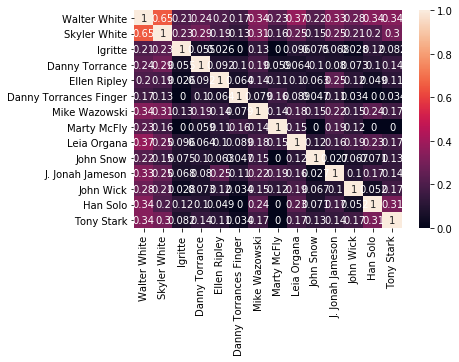

In [111]:
import seaborn as sns
sim_df = pd.DataFrame(similarity_matrix, columns=dic_users.keys(), index=dic_users.keys())
display(sim_df)
sns.heatmap(sim_df,annot=True)

In [112]:
# Max similarities of related documents
import numpy as np
np.fill_diagonal(sim_df.values, 0) # Remove diagonal max values and set those to 0
sim_df.idxmax()

Walter White                  Skyler White
Skyler White                  Walter White
Igritte                       Skyler White
Danny Torrance                Skyler White
Ellen Ripley              J. Jonah Jameson
Danny Torrances Finger        Walter White
Mike Wazowski                 Walter White
Marty McFly                   Walter White
Leia Organa                   Walter White
John Snow                     Walter White
J. Jonah Jameson              Walter White
John Wick                     Walter White
Han Solo                      Walter White
Tony Stark                    Walter White
dtype: object